# Load Data

In [2]:
import sys, os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from torchvision.utils import make_grid
import matplotlib.pyplot as plt

from src.data import build_dataloaders

try:
    result = build_dataloaders(
        data_root="../data",
        size=224,
        batch_size=10,
        seed=67,
        augmentationTier=3,
    )
    train_loader, val_loader, test_loader, meta = result
except Exception as e:
    print("Failed to build dataloaders:", e)
    raise

# Get one batch (only if build succeeded)
images, labels = next(iter(train_loader))

Discovered 21710 samples in 10 classes.
Augmentation Tier 3 - Train/val/test split: 17380/2165/2165


In [3]:
print("Batch shape:", images.shape)   # expect [B, 3, 224, 224]
print("Labels:", labels)
print("dtype:", images.dtype)

Batch shape: torch.Size([10, 3, 224, 224])
Labels: tensor([1, 1, 5, 7, 3, 5, 8, 4, 1, 2])
dtype: torch.float32


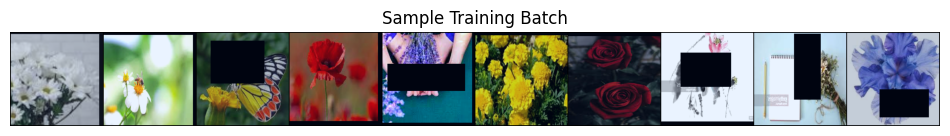

0: Daisy
1: Daisy
2: Marigold
3: Poppy
4: Lavender
5: Marigold
6: Rose
7: Lily
8: Daisy
9: Iris


In [6]:
import numpy as np
from torchvision.utils import make_grid
npimg = make_grid(images, nrow=min(10, images.size(0)), normalize=True).permute(1, 2, 0).cpu().numpy()

plt.figure(figsize=(12, 4))
plt.imshow(npimg)
plt.title("Sample Training Batch")
plt.axis("off")
plt.show()
for i, label in enumerate(labels):
    print(f"{i}: {meta['class_names'][label]}")
